### Project 2

Background:

ACME is a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data. 

Ultimately, at ACME we are looking to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends.


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pycaret

from scipy import stats
from scipy.stats import skew

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from pycaret.classification import *

In [2]:
data = pd.read_csv('term-deposit-marketing-2020.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


age : age of customer (numeric)\
job : type of job (categorical)\
marital : marital status (categorical)\
education (categorical)\
default: has credit in default? (binary)\
balance: average yearly balance, in euros (numeric)\
housing: has a housing loan? (binary)\
loan: has personal loan? (binary)\
contact: contact communication type (categorical)\
day: last contact day of the month (numeric)\
month: last contact month of year (categorical)\
duration: last contact duration, in seconds (numeric)\
campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\
Output (desired target):\
y - has the client subscribed to a term deposit? (binary)

In [4]:
# check data info, data types, and NAs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
# check some features
data[['age', 'balance','day','duration','campaign']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


In [6]:
print(data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y']


### Data Visualization and EDA

Text(0, 0.5, 'Probability')

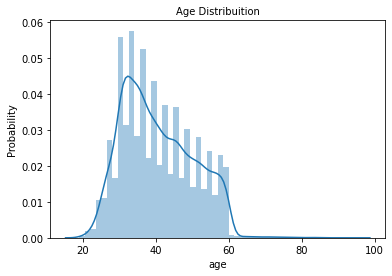

In [7]:
sns.distplot(data['age'])
plt.title("Age Distribuition", fontsize=10)
plt.ylabel("Probability", fontsize=10)

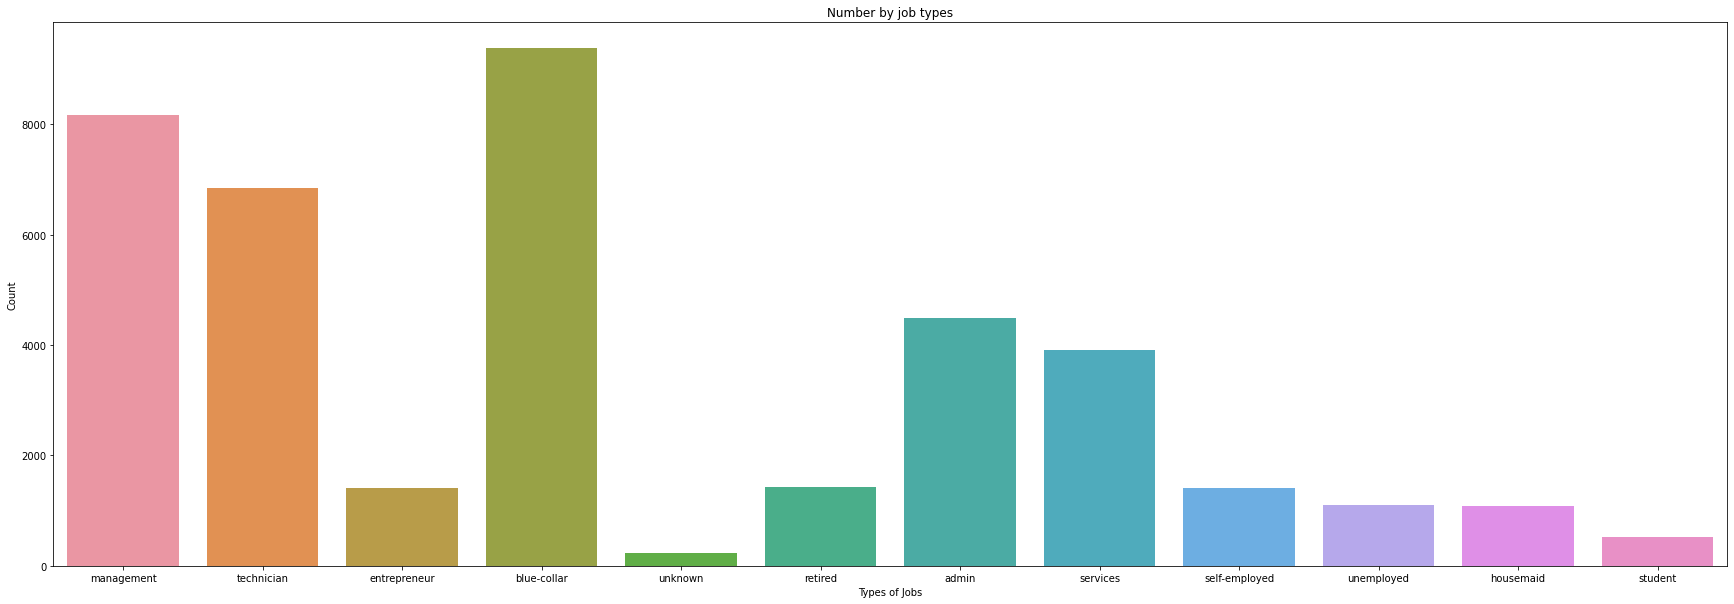

In [8]:
plt.figure(figsize=(30,10))
sns.countplot(data['job'])
plt.xlabel('Types of Jobs')
plt.ylabel('Count')
plt.title("Number by job types")
plt.show()

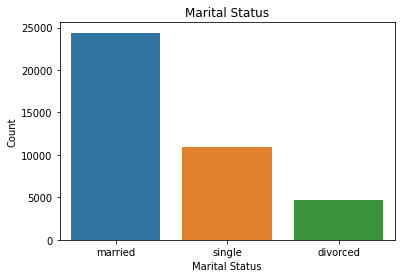

In [9]:
sns.countplot(data['marital'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title("Marital Status")
plt.show()

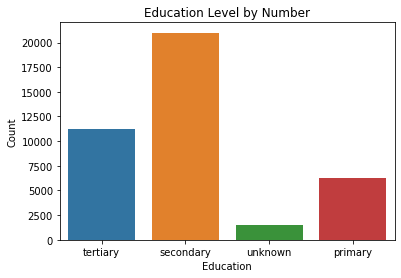

In [10]:
sns.countplot(data['education'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title("Education Level by Number")
plt.show()

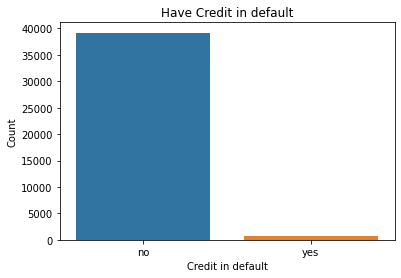

In [11]:
sns.countplot(data['default'])
plt.xlabel('Credit in default')
plt.ylabel('Count')
plt.title("Have Credit in default")
plt.show()

Text(0, 0.5, 'Probability')

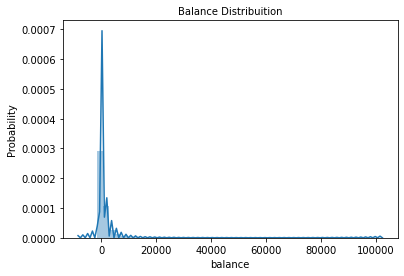

In [12]:
sns.distplot(data['balance'])
plt.title("Balance Distribuition", fontsize=10)
plt.ylabel("Probability", fontsize=10)


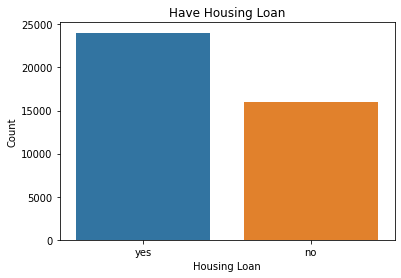

In [13]:
sns.countplot(data['housing'])
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.title("Have Housing Loan")
plt.show()

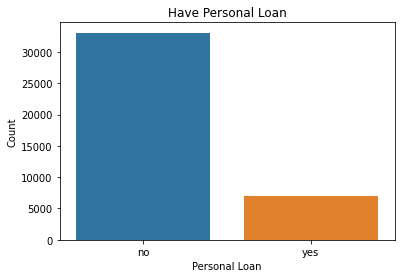

In [14]:
sns.countplot(data['loan'])
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.title("Have Personal Loan")
plt.show()

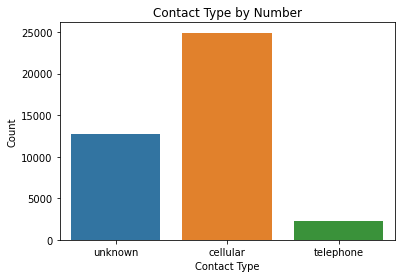

In [15]:
sns.countplot(data['contact'])
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.title("Contact Type by Number")
plt.show()

Text(0, 0.5, 'Probability')

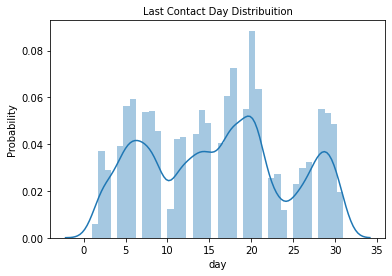

In [16]:
sns.distplot(data['day'])
plt.title("Last Contact Day Distribuition", fontsize=10)
plt.ylabel("Probability", fontsize=10)

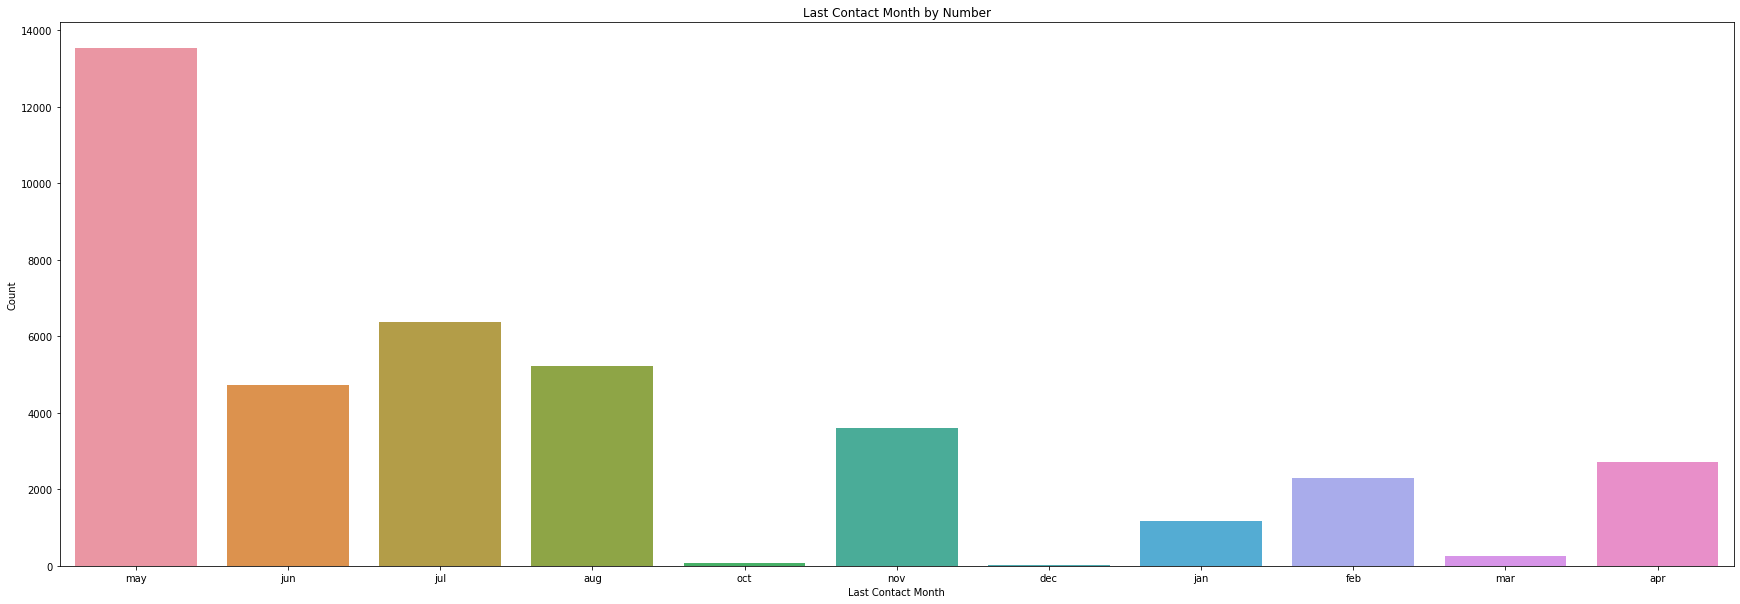

In [17]:
plt.figure(figsize=(30,10))
sns.countplot(data['month'])
plt.xlabel('Last Contact Month')
plt.ylabel('Count')
plt.title("Last Contact Month by Number")
plt.show()

Text(0, 0.5, 'Probability')

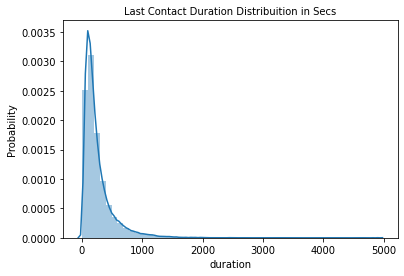

In [18]:
sns.distplot(data['duration'])
plt.title("Last Contact Duration Distribuition in Secs", fontsize=10)
plt.ylabel("Probability", fontsize=10)

Text(0, 0.5, 'Probability')

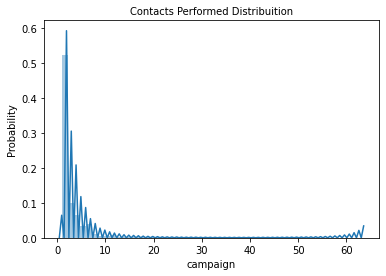

In [19]:
sns.distplot(data['campaign'])
plt.title("Contacts Performed Distribuition", fontsize=10)
plt.ylabel("Probability", fontsize=10)

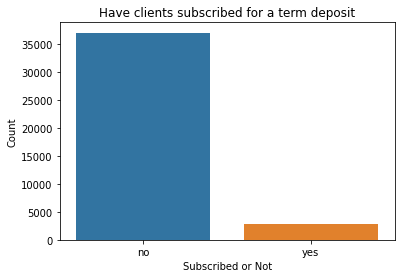

In [20]:
sns.countplot(data['y'])
plt.xlabel('Subscribed or Not')
plt.ylabel('Count')
plt.title("Have clients subscribed for a term deposit")
plt.show()

From the histograms and distribution plots, we can see that the data is highly imbalanced and skewed.

In [21]:
# data skewness
data.skew().sort_values(ascending = False)

balance     8.259236
campaign    4.730901
duration    3.165307
age         0.436080
day         0.067930
dtype: float64

balance, campaign, duration is highly skewed, age is moderately skewed, day and housing is normally distributed. Based on visualization plots, we will apply transformations on balance and duration data


We plot the Pearson correlation coefficient heatmap to study correlations among response variables and identify potential multi-collinearity.

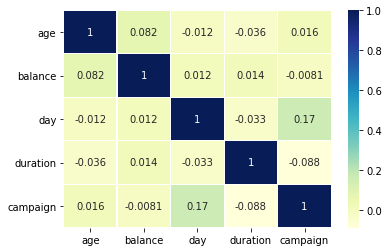

In [22]:
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

#### some feature engineering

We convert y variables, default, housing loans, personal loans to 0 and 1

In [24]:
data['y'] = data['y'].map({'yes':1, 'no':0})
data['default'] = data['default'].map({'yes':1, 'no':0})
data['housing'] = data['housing'].map({'yes':1, 'no':0})
data['loan'] = data['loan'].map({'yes':1, 'no':0})

#### bootstrap method
We perform boostrapping to look at the statistical significance of subscription status

In [26]:
mean = data['y'].values.mean()
print('The mean of the y variable is ' + str(mean))

The mean of the y variable is 0.0724


In [27]:
print(len(data[data.y1==1]))
print(len(data[data.y1==0]))

2896
37104


In [28]:
# bootstrap method: re-sample points with replacement
def bootstrap(sample):
    sample_mean = []
    for i in range(35000):
        sample_n = np.random.choice(sample, len(sample))
        sample_mean.append(sample_n.mean())
    return sample_mean

In [29]:
sample = bootstrap(data['y'].values)
sample_dist = sorted(sample)
lb = np.quantile(sample_dist, 0.025)
ub = np.quantile(sample_dist, 0.975)
print('The 95% confidence interval is between {} and {}, so we can conclude that 95% of times that mean reviews will lie in this range'.format(lb, ub))

The 95% confidence interval is between 0.069825 and 0.07495, so we can conclude that 95% of times that mean reviews will lie in this range


(array([2.2000e+01, 2.9200e+02, 1.8570e+03, 6.1780e+03, 1.1017e+04,
        9.9290e+03, 4.5240e+03, 1.0290e+03, 1.4700e+02, 5.0000e+00]),
 array([0.067125, 0.068215, 0.069305, 0.070395, 0.071485, 0.072575,
        0.073665, 0.074755, 0.075845, 0.076935, 0.078025]),
 <a list of 10 Patch objects>)

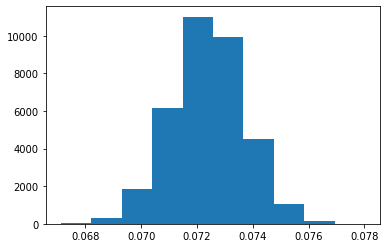

In [30]:
plt.hist(sample_dist)

#### data skewness removal and normalization

In [31]:
# yeo-johnson transformation on campaign, duration, balance data
d1, l1 = stats.yeojohnson(data['campaign'])
data['campaign'] = d1

d2, l2 = stats.yeojohnson(data['duration'])
data['duration'] = d2

d3, l3 = stats.yeojohnson(data['balance'])
data['balance'] = d3

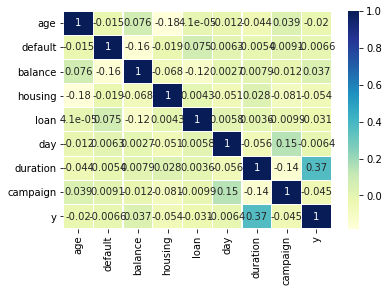

In [32]:
sns.heatmap(data.corr(), linewidths=.1, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

#### More feature engineering
object encoding

In [34]:
from sklearn.preprocessing import *

for col in data.drop('y', axis=1).columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))

In [36]:
print(data.dtypes.tolist())

[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('int64')]


#### Split Dataset and Modelling

In [39]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn import tree
from sklearn.model_selection import *
from pycaret.classification import setup, compare_models, tune_model

In [40]:
# load dataset
X1 = data.drop('y', axis=1).values
y1 = data['y'].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=123)

In [41]:
# convert to dataframe
def convert_df(x, y):
    df = pd.DataFrame(x)
    df['y'] = y
    return df

In [42]:
df1 = convert_df(X_train1, y_train1)

In [43]:
# setup - preprocessing
clf1 = setup(data = df1, target = df1.columns[-1], html = False, silent = True, verbose = False)
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
knn,K Neighbors Classifier,0.9245,0.5807,0.0173,0.3514,0.0328,0.0260,0.0630,0.132


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
knn,K Neighbors Classifier,0.9245,0.5807,0.0173,0.3514,0.0328,0.0260,0.0630,0.132


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
knn,K Neighbors Classifier,0.9245,0.5807,0.0173,0.3514,0.0328,0.0260,0.0630,0.132
dt,Decision Tree Classifier,0.9141,0.6972,0.4424,0.4261,0.4334,0.3870,0.3875,0.063


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
knn,K Neighbors Classifier,0.9245,0.5807,0.0173,0.3514,0.0328,0.0260,0.0630,0.132
dt,Decision Tree Classifier,0.9141,0.6972,0.4424,0.4261,0.4334,0.3870,0.3875,0.063
svm,SVM - Linear Kernel,0.8197,0.0000,0.2452,0.1429,0.1527,0.0758,0.0883,0.072


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
ridge,Ridge Classifier,0.9256,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.033
knn,K Neighbors Classifier,0.9245,0.5807,0.0173,0.3514,0.0328,0.0260,0.0630,0.132
dt,Decision Tree Classifier,0.9141,0.6972,0.4424,0.4261,0.4334,0.3870,0.3875,0.063
svm,SVM - Linear Kernel,0.8197,0.0000,0.2452,0.1429,0.1527,0.0758,0.0883,0.072


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9347,0.9379,0.3381,0.6090,0.4335,0.4020,0.4223,0.934
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
ridge,Ridge Classifier,0.9256,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.033
knn,K Neighbors Classifier,0.9245,0.5807,0.0173,0.3514,0.0328,0.0260,0.0630,0.132
dt,Decision Tree Classifier,0.9141,0.6972,0.4424,0.4261,0.4334,0.3870,0.3875,0.063
svm,SVM - Linear Kernel,0.8197,0.0000,0.2452,0.1429,0.1527,0.0758,0.0883,0.072


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9347,0.9379,0.3381,0.6090,0.4335,0.4020,0.4223,0.934
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
qda,Quadratic Discriminant Analysis,0.9311,0.8924,0.2894,0.5750,0.3838,0.3516,0.3756,0.038
ridge,Ridge Classifier,0.9256,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.033
knn,K Neighbors Classifier,0.9245,0.5807,0.0173,0.3514,0.0328,0.0260,0.0630,0.132
dt,Decision Tree Classifier,0.9141,0.6972,0.4424,0.4261,0.4334,0.3870,0.3875,0.063
svm,SVM - Linear Kernel,0.8197,0.0000,0.2452,0.1429,0.1527,0.0758,0.0883,0.072


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9347,0.9379,0.3381,0.6090,0.4335,0.4020,0.4223,0.934
ada,Ada Boost Classifier,0.9326,0.9271,0.3528,0.5776,0.4365,0.4030,0.4176,0.370
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
qda,Quadratic Discriminant Analysis,0.9311,0.8924,0.2894,0.5750,0.3838,0.3516,0.3756,0.038
ridge,Ridge Classifier,0.9256,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.033
knn,K Neighbors Classifier,0.9245,0.5807,0.0173,0.3514,0.0328,0.0260,0.0630,0.132
dt,Decision Tree Classifier,0.9141,0.6972,0.4424,0.4261,0.4334,0.3870,0.3875,0.063
svm,SVM - Linear Kernel,0.8197,0.0000,0.2452,0.1429,0.1527,0.0758,0.0883,0.072


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9367,0.9409,0.3560,0.6328,0.4547,0.4240,0.4443,1.228
rf,Random Forest Classifier,0.9347,0.9379,0.3381,0.6090,0.4335,0.4020,0.4223,0.934
ada,Ada Boost Classifier,0.9326,0.9271,0.3528,0.5776,0.4365,0.4030,0.4176,0.370
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
qda,Quadratic Discriminant Analysis,0.9311,0.8924,0.2894,0.5750,0.3838,0.3516,0.3756,0.038
ridge,Ridge Classifier,0.9256,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.033
knn,K Neighbors Classifier,0.9245,0.5807,0.0173,0.3514,0.0328,0.0260,0.0630,0.132
dt,Decision Tree Classifier,0.9141,0.6972,0.4424,0.4261,0.4334,0.3870,0.3875,0.063
svm,SVM - Linear Kernel,0.8197,0.0000,0.2452,0.1429,0.1527,0.0758,0.0883,0.072


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9367,0.9409,0.3560,0.6328,0.4547,0.4240,0.4443,1.228
rf,Random Forest Classifier,0.9347,0.9379,0.3381,0.6090,0.4335,0.4020,0.4223,0.934
ada,Ada Boost Classifier,0.9326,0.9271,0.3528,0.5776,0.4365,0.4030,0.4176,0.370
lda,Linear Discriminant Analysis,0.9323,0.8964,0.2183,0.6324,0.3233,0.2966,0.3443,0.063
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
qda,Quadratic Discriminant Analysis,0.9311,0.8924,0.2894,0.5750,0.3838,0.3516,0.3756,0.038
ridge,Ridge Classifier,0.9256,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.033
knn,K Neighbors Classifier,0.9245,0.5807,0.0173,0.3514,0.0328,0.0260,0.0630,0.132
dt,Decision Tree Classifier,0.9141,0.6972,0.4424,0.4261,0.4334,0.3870,0.3875,0.063


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9367,0.9409,0.3560,0.6328,0.4547,0.4240,0.4443,1.228
rf,Random Forest Classifier,0.9347,0.9379,0.3381,0.6090,0.4335,0.4020,0.4223,0.934
ada,Ada Boost Classifier,0.9326,0.9271,0.3528,0.5776,0.4365,0.4030,0.4176,0.370
lda,Linear Discriminant Analysis,0.9323,0.8964,0.2183,0.6324,0.3233,0.2966,0.3443,0.063
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
qda,Quadratic Discriminant Analysis,0.9311,0.8924,0.2894,0.5750,0.3838,0.3516,0.3756,0.038
et,Extra Trees Classifier,0.9311,0.9317,0.1799,0.6308,0.2793,0.2548,0.3117,1.001
ridge,Ridge Classifier,0.9256,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.033
knn,K Neighbors Classifier,0.9245,0.5807,0.0173,0.3514,0.0328,0.0260,0.0630,0.132


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9367,0.9409,0.3560,0.6328,0.4547,0.4240,0.4443,1.228
lightgbm,Light Gradient Boosting Machine,0.9363,0.9488,0.4194,0.6016,0.4935,0.4607,0.4696,0.256
rf,Random Forest Classifier,0.9347,0.9379,0.3381,0.6090,0.4335,0.4020,0.4223,0.934
ada,Ada Boost Classifier,0.9326,0.9271,0.3528,0.5776,0.4365,0.4030,0.4176,0.370
lda,Linear Discriminant Analysis,0.9323,0.8964,0.2183,0.6324,0.3233,0.2966,0.3443,0.063
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
qda,Quadratic Discriminant Analysis,0.9311,0.8924,0.2894,0.5750,0.3838,0.3516,0.3756,0.038
et,Extra Trees Classifier,0.9311,0.9317,0.1799,0.6308,0.2793,0.2548,0.3117,1.001
ridge,Ridge Classifier,0.9256,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.033


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9379,0.9512,0.4264,0.6187,0.5038,0.4720,0.4818,15.066
gbc,Gradient Boosting Classifier,0.9367,0.9409,0.3560,0.6328,0.4547,0.4240,0.4443,1.228
lightgbm,Light Gradient Boosting Machine,0.9363,0.9488,0.4194,0.6016,0.4935,0.4607,0.4696,0.256
rf,Random Forest Classifier,0.9347,0.9379,0.3381,0.6090,0.4335,0.4020,0.4223,0.934
ada,Ada Boost Classifier,0.9326,0.9271,0.3528,0.5776,0.4365,0.4030,0.4176,0.370
lda,Linear Discriminant Analysis,0.9323,0.8964,0.2183,0.6324,0.3233,0.2966,0.3443,0.063
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
qda,Quadratic Discriminant Analysis,0.9311,0.8924,0.2894,0.5750,0.3838,0.3516,0.3756,0.038
et,Extra Trees Classifier,0.9311,0.9317,0.1799,0.6308,0.2793,0.2548,0.3117,1.001


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9379,0.9512,0.4264,0.6187,0.5038,0.4720,0.4818,15.066
gbc,Gradient Boosting Classifier,0.9367,0.9409,0.3560,0.6328,0.4547,0.4240,0.4443,1.228
lightgbm,Light Gradient Boosting Machine,0.9363,0.9488,0.4194,0.6016,0.4935,0.4607,0.4696,0.256
rf,Random Forest Classifier,0.9347,0.9379,0.3381,0.6090,0.4335,0.4020,0.4223,0.934
ada,Ada Boost Classifier,0.9326,0.9271,0.3528,0.5776,0.4365,0.4030,0.4176,0.370
lda,Linear Discriminant Analysis,0.9323,0.8964,0.2183,0.6324,0.3233,0.2966,0.3443,0.063
lr,Logistic Regression,0.9321,0.8962,0.2458,0.6116,0.3495,0.3205,0.3586,1.692
nb,Naive Bayes,0.9312,0.8867,0.2741,0.5800,0.3702,0.3389,0.3667,0.032
qda,Quadratic Discriminant Analysis,0.9311,0.8924,0.2894,0.5750,0.3838,0.3516,0.3756,0.038
et,Extra Trees Classifier,0.9311,0.9317,0.1799,0.6308,0.2793,0.2548,0.3117,1.001


#### Boostrap method on target variable y

In [61]:
# subscribed and unsubscribed clients
con1 = data['y']==1
data_sub = data.loc[con1].reset_index(drop = True)
con2 = data['y']==0
data_unsub = data.loc[con2].reset_index(drop = True)

array1 = data_sub.values
array2 = data_unsub.values

print(len(data_sub))
print(len(data_unsub))

# more unsubscribed customers than subscribed customers. 
# So, we will make an equal list based on number of subscribed customers

2896
37104


In [62]:
# boostrapping: run 10000 iterations, each iteration randomly choose 3000 samples
# then select 3000 samples from the main bagging
n_itr = 10000
n_sample = 2896

list_sub = []
list_unsub = []

# for loop to store samples of subscribed customers in the main bagging
for i in range(n_itr):
    idx = np.random.choice(np.arange(0, n_sample))
    d = array1[idx]
    list_sub.append(d)
    
# for loop to store samples of unsubscribed customers in the main bagging
for i in range(n_itr):
    idx = np.random.choice(np.arange(0, n_sample))
    d = array2[idx]
    list_unsub.append(d)

In [63]:
# Store the 3000 samples of subscribed and unsubscribed customers in seperate lists
sub_customer = []
unsub_customer = []

for i in range(n_sample):
    idx = np.random.choice(a = np.arange(0, n_itr))
    d = list_sub[idx]
    sub_customer.append(d)

for i in range(n_sample):
    idx = np.random.choice(a = np.arange(0, n_itr))
    d = list_unsub[idx]
    unsub_customer.append(d)

In [64]:
# Create dataframes
sub_df = pd.DataFrame(sub_customer)
sub_df.columns = data.columns

unsub_df = pd.DataFrame(unsub_customer)
unsub_df.columns = data.columns

data_balanced = pd.concat([sub_df, unsub_df], axis = 0).reset_index(drop = True)



In [65]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        5792 non-null   float64
 1   job        5792 non-null   float64
 2   marital    5792 non-null   float64
 3   education  5792 non-null   float64
 4   default    5792 non-null   float64
 5   balance    5792 non-null   float64
 6   housing    5792 non-null   float64
 7   loan       5792 non-null   float64
 8   contact    5792 non-null   float64
 9   day        5792 non-null   float64
 10  month      5792 non-null   float64
 11  duration   5792 non-null   float64
 12  campaign   5792 non-null   float64
 13  y          5792 non-null   float64
dtypes: float64(14)
memory usage: 633.6 KB


In [66]:
data_balanced['y'].mean()

0.5

#### Modelling on Balanced Dataset

In [67]:
X2 = data_balanced.drop(columns = 'y', axis = 1).values
y2 = data_balanced['y'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state = 123)

In [68]:
# convert to dataframe
df2 = convert_df(X_train2, y_train2)

In [69]:
clf2 = setup(data = df2, target = df2.columns[-1], html = False, silent = True, verbose = False)
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
knn,K Neighbors Classifier,0.7865,0.8735,0.7088,0.8378,0.7672,0.5726,0.5801,0.080


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
knn,K Neighbors Classifier,0.7865,0.8735,0.7088,0.8378,0.7672,0.5726,0.5801,0.080


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
knn,K Neighbors Classifier,0.7865,0.8735,0.7088,0.8378,0.7672,0.5726,0.5801,0.080


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
svm,SVM - Linear Kernel,0.7872,0.0000,0.8623,0.7772,0.8041,0.5750,0.5979,0.018
knn,K Neighbors Classifier,0.7865,0.8735,0.7088,0.8378,0.7672,0.5726,0.5801,0.080


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
ridge,Ridge Classifier,0.9276,0.0000,0.8551,0.9992,0.9212,0.8551,0.8644,0.017
svm,SVM - Linear Kernel,0.7872,0.0000,0.8623,0.7772,0.8041,0.5750,0.5979,0.018
knn,K Neighbors Classifier,0.7865,0.8735,0.7088,0.8378,0.7672,0.5726,0.5801,0.080


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
rf,Random Forest Classifier,0.9908,0.9998,0.9868,0.9947,0.9907,0.9816,0.9817,0.370
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
ridge,Ridge Classifier,0.9276,0.0000,0.8551,0.9992,0.9212,0.8551,0.8644,0.017
svm,SVM - Linear Kernel,0.7872,0.0000,0.8623,0.7772,0.8041,0.5750,0.5979,0.018
knn,K Neighbors Classifier,0.7865,0.8735,0.7088,0.8378,0.7672,0.5726,0.5801,0.080


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
rf,Random Forest Classifier,0.9908,0.9998,0.9868,0.9947,0.9907,0.9816,0.9817,0.370
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
ridge,Ridge Classifier,0.9276,0.0000,0.8551,0.9992,0.9212,0.8551,0.8644,0.017
svm,SVM - Linear Kernel,0.7872,0.0000,0.8623,0.7772,0.8041,0.5750,0.5979,0.018
knn,K Neighbors Classifier,0.7865,0.8735,0.7088,0.8378,0.7672,0.5726,0.5801,0.080
qda,Quadratic Discriminant Analysis,0.6211,0.6409,0.9848,0.5812,0.7264,0.2458,0.3276,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
rf,Random Forest Classifier,0.9908,0.9998,0.9868,0.9947,0.9907,0.9816,0.9817,0.370
ada,Ada Boost Classifier,0.9865,0.9994,0.9828,0.9901,0.9864,0.9730,0.9732,0.118
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
ridge,Ridge Classifier,0.9276,0.0000,0.8551,0.9992,0.9212,0.8551,0.8644,0.017
svm,SVM - Linear Kernel,0.7872,0.0000,0.8623,0.7772,0.8041,0.5750,0.5979,0.018
knn,K Neighbors Classifier,0.7865,0.8735,0.7088,0.8378,0.7672,0.5726,0.5801,0.080
qda,Quadratic Discriminant Analysis,0.6211,0.6409,0.9848,0.5812,0.7264,0.2458,0.3276,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
rf,Random Forest Classifier,0.9908,0.9998,0.9868,0.9947,0.9907,0.9816,0.9817,0.370
gbc,Gradient Boosting Classifier,0.9885,0.9996,0.9821,0.9947,0.9883,0.9770,0.9771,0.231
ada,Ada Boost Classifier,0.9865,0.9994,0.9828,0.9901,0.9864,0.9730,0.9732,0.118
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
ridge,Ridge Classifier,0.9276,0.0000,0.8551,0.9992,0.9212,0.8551,0.8644,0.017
svm,SVM - Linear Kernel,0.7872,0.0000,0.8623,0.7772,0.8041,0.5750,0.5979,0.018
knn,K Neighbors Classifier,0.7865,0.8735,0.7088,0.8378,0.7672,0.5726,0.5801,0.080
qda,Quadratic Discriminant Analysis,0.6211,0.6409,0.9848,0.5812,0.7264,0.2458,0.3276,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
rf,Random Forest Classifier,0.9908,0.9998,0.9868,0.9947,0.9907,0.9816,0.9817,0.370
gbc,Gradient Boosting Classifier,0.9885,0.9996,0.9821,0.9947,0.9883,0.9770,0.9771,0.231
ada,Ada Boost Classifier,0.9865,0.9994,0.9828,0.9901,0.9864,0.9730,0.9732,0.118
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
ridge,Ridge Classifier,0.9276,0.0000,0.8551,0.9992,0.9212,0.8551,0.8644,0.017
lda,Linear Discriminant Analysis,0.9276,0.9933,0.8551,0.9992,0.9212,0.8551,0.8644,0.031
svm,SVM - Linear Kernel,0.7872,0.0000,0.8623,0.7772,0.8041,0.5750,0.5979,0.018
knn,K Neighbors Classifier,0.7865,0.8735,0.7088,0.8378,0.7672,0.5726,0.5801,0.080


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
et,Extra Trees Classifier,0.9911,0.9997,0.9835,0.9987,0.9910,0.9822,0.9824,0.334
rf,Random Forest Classifier,0.9908,0.9998,0.9868,0.9947,0.9907,0.9816,0.9817,0.370
gbc,Gradient Boosting Classifier,0.9885,0.9996,0.9821,0.9947,0.9883,0.9770,0.9771,0.231
ada,Ada Boost Classifier,0.9865,0.9994,0.9828,0.9901,0.9864,0.9730,0.9732,0.118
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
ridge,Ridge Classifier,0.9276,0.0000,0.8551,0.9992,0.9212,0.8551,0.8644,0.017
lda,Linear Discriminant Analysis,0.9276,0.9933,0.8551,0.9992,0.9212,0.8551,0.8644,0.031
svm,SVM - Linear Kernel,0.7872,0.0000,0.8623,0.7772,0.8041,0.5750,0.5979,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
et,Extra Trees Classifier,0.9911,0.9997,0.9835,0.9987,0.9910,0.9822,0.9824,0.334
rf,Random Forest Classifier,0.9908,0.9998,0.9868,0.9947,0.9907,0.9816,0.9817,0.370
lightgbm,Light Gradient Boosting Machine,0.9908,0.9996,0.9881,0.9935,0.9907,0.9816,0.9817,0.086
gbc,Gradient Boosting Classifier,0.9885,0.9996,0.9821,0.9947,0.9883,0.9770,0.9771,0.231
ada,Ada Boost Classifier,0.9865,0.9994,0.9828,0.9901,0.9864,0.9730,0.9732,0.118
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
ridge,Ridge Classifier,0.9276,0.0000,0.8551,0.9992,0.9212,0.8551,0.8644,0.017
lda,Linear Discriminant Analysis,0.9276,0.9933,0.8551,0.9992,0.9212,0.8551,0.8644,0.031


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
et,Extra Trees Classifier,0.9911,0.9997,0.9835,0.9987,0.9910,0.9822,0.9824,0.334
catboost,CatBoost Classifier,0.9911,0.9998,0.9888,0.9934,0.9910,0.9822,0.9823,2.506
rf,Random Forest Classifier,0.9908,0.9998,0.9868,0.9947,0.9907,0.9816,0.9817,0.370
lightgbm,Light Gradient Boosting Machine,0.9908,0.9996,0.9881,0.9935,0.9907,0.9816,0.9817,0.086
gbc,Gradient Boosting Classifier,0.9885,0.9996,0.9821,0.9947,0.9883,0.9770,0.9771,0.231
ada,Ada Boost Classifier,0.9865,0.9994,0.9828,0.9901,0.9864,0.9730,0.9732,0.118
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
ridge,Ridge Classifier,0.9276,0.0000,0.8551,0.9992,0.9212,0.8551,0.8644,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9921,0.9934,0.9908,0.9921,0.9842,0.9843,0.016
et,Extra Trees Classifier,0.9911,0.9997,0.9835,0.9987,0.9910,0.9822,0.9824,0.334
catboost,CatBoost Classifier,0.9911,0.9998,0.9888,0.9934,0.9910,0.9822,0.9823,2.506
rf,Random Forest Classifier,0.9908,0.9998,0.9868,0.9947,0.9907,0.9816,0.9817,0.370
lightgbm,Light Gradient Boosting Machine,0.9908,0.9996,0.9881,0.9935,0.9907,0.9816,0.9817,0.086
gbc,Gradient Boosting Classifier,0.9885,0.9996,0.9821,0.9947,0.9883,0.9770,0.9771,0.231
ada,Ada Boost Classifier,0.9865,0.9994,0.9828,0.9901,0.9864,0.9730,0.9732,0.118
lr,Logistic Regression,0.9688,0.9945,0.9563,0.9806,0.9681,0.9375,0.9381,0.566
nb,Naive Bayes,0.9684,0.9965,0.9398,0.9966,0.9672,0.9368,0.9385,0.018
ridge,Ridge Classifier,0.9276,0.0000,0.8551,0.9992,0.9212,0.8551,0.8644,0.017


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3601, splitter='best')


We will use Decision Tree, Random Forest, Gradient Boosting, and depending on the results of the models, a voting classifier

In [70]:
# final model variables
X = df2.drop(columns = 'y', axis = 1).values
y = df2['y'].values

# Divition of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [71]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

#### Random Forest

In [72]:
param_grid = {'n_estimators': [50, 100, 150, 200, 250],
              'criterion' : ['gini', 'entropy'],
              'max_depth': [3, 5, 7],
              }

rf = RandomForestClassifier()
cv_rf = GridSearchCV(rf, param_grid, cv = 5)
cv_rf_fit = cv_rf.fit(X_train, y_train)

print(cv_rf_fit.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 200}


In [73]:
rf = RandomForestClassifier(criterion = 'gini',max_depth = 7, n_estimators = 2000)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print("Accuracy score {:.4f}".format(accuracy_score(y_test, rf_pred)))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       566
         1.0       1.00      0.97      0.99       520

    accuracy                           0.99      1086
   macro avg       0.99      0.99      0.99      1086
weighted avg       0.99      0.99      0.99      1086

Accuracy score 0.9880


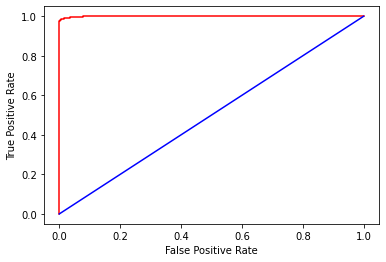

In [74]:
rf_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rf_pred_prob)

plt.plot(fpr, tpr, color = 'red')
plt.plot([0,1], [0,1], color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Decision Tree

In [75]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [3, 5, 7],
             'min_samples_split':[2, 4, 6, 8]
             }

dt = DecisionTreeClassifier()
cv_dt = GridSearchCV(dt, param_grid, cv = 5)
cv_dt_fit = cv_dt.fit(X_train, y_train)

print(cv_dt_fit.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}


In [79]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_split = 2)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print(classification_report(y_test, dt_pred))
print("Accuracy score {:.4f}".format(accuracy_score(y_test, dt_pred)))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       566
         1.0       1.00      0.98      0.99       520

    accuracy                           0.99      1086
   macro avg       0.99      0.99      0.99      1086
weighted avg       0.99      0.99      0.99      1086

Accuracy score 0.9890


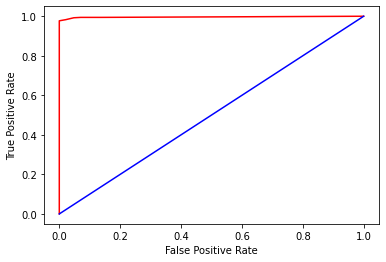

In [80]:
dt_pred_prob = dt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, dt_pred_prob)

plt.plot(fpr, tpr, color = 'red')
plt.plot([0,1], [0,1], color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Gradient Boosting

In [78]:
param_grid = {'n_estimators':[50, 100, 150, 200],
              'max_depth':[3,5,7,9], 
              'min_samples_split':[2,4,6,8]
             }

gb = GradientBoostingClassifier()
cv_gb = GridSearchCV(gb, param_grid, cv = 5)
cv_gb_fit = cv_gb.fit(X_train, y_train)

print(cv_gb_fit.best_params_)

{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 200}


In [81]:
gb = GradientBoostingClassifier(n_estimators = 200, max_depth = 3, min_samples_split = 4)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print(classification_report(y_test, gb_pred))
print("Accuracy score {:.4f}".format(accuracy_score(y_test, gb_pred)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       566
         1.0       1.00      0.99      0.99       520

    accuracy                           0.99      1086
   macro avg       0.99      0.99      0.99      1086
weighted avg       0.99      0.99      0.99      1086

Accuracy score 0.9945


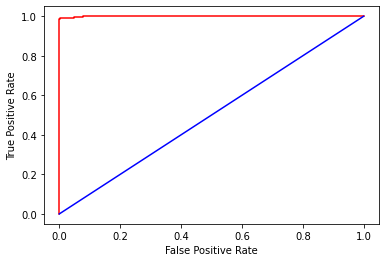

In [82]:
gb_pred_prob = gb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, gb_pred_prob)

plt.plot(fpr, tpr, color = 'red')
plt.plot([0,1], [0,1], color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Voting Classifier

In [83]:
clf1 = RandomForestClassifier(criterion = 'gini',max_depth = 7, n_estimators = 200)

clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_split = 2)

clf3 = GradientBoostingClassifier(n_estimators = 200, max_depth = 3, min_samples_split = 4)



In [ ]:
#### taking too long
# empty list to store different weights
weights1 = []
weights2 = []
weights3 = []
scores = []

# try different combination of weights
for i in np.arange(0.1,1, 0.1):
    for j in np.arange(0.1,1, 0.1):
        for k in np.arange(0.1,1, 0.1):
            clf_voting = VotingClassifier(estimators = [('est1', clf1), ('est2', clf2),
                                           ('est3', clf3)], voting = 'soft', weights = [i, j, k])
            clf_voting.fit(X_train, y_train)
            pred = clf_voting.predict(X_test)
            score = accuracy_score(y_test, pred)
            scores.append(score)
            weights1.append(i)
            weights2.append(j)
            weights3.append(k)

In [85]:
# try only random forest and decision tree
# empty list to store different weights
weights1 = []
weights2 = []
scores = []

# try different combination of weights
for i in np.arange(0.1,1, 0.1):
    for j in np.arange(0.1,1, 0.1):
            clf_voting = VotingClassifier(estimators = [('est1', clf1), ('est2', clf2)], voting = 'soft', weights = [i, j])
            clf_voting.fit(X_train, y_train)
            pred = clf_voting.predict(X_test)
            score = accuracy_score(y_test, pred)
            scores.append(score)
            weights1.append(i)
            weights2.append(j)

In [86]:
test_scores = pd.DataFrame()
test_scores['RandomForest'] = weights1
test_scores['DecisionTree'] = weights2
#test_scores['GradientBoosting'] = weights3
test_scores['TestScore'] = scores

test_scores['sum_weights'] = test_scores['RandomForest'].add(test_scores['DecisionTree'])
#test_scores['sum_weights'] = test_scores['RandomForest'].add(test_scores['DecisionTree']).add(test_scores['GradientBoosting'])

# getting the rows where sum is equal to 1
condition = test_scores['sum_weights'] == 1

test_scores = test_scores.loc[condition]

# sort values to see the top 10 scores
test_scores.sort_values(by = 'TestScore', ascending = False).head(10)

,RandomForest,DecisionTree,TestScore,sum_weights
32,0.4,0.6,0.989871,1.0
40,0.5,0.5,0.989871,1.0
48,0.6,0.4,0.989871,1.0
56,0.7,0.3,0.989871,1.0
64,0.8,0.2,0.989871,1.0
8,0.1,0.9,0.988950,1.0
16,0.2,0.8,0.988950,1.0
24,0.3,0.7,0.988950,1.0
72,0.9,0.1,0.988950,1.0


In [87]:
# Create voting classifier with most equally weighted

clf_voting = VotingClassifier(estimators = [('est1', clf1), ('est2', clf2)], voting = 'soft', weights = [0.5, 0.5])
#clf_voting.fit(X_train, y_train)
#pred_voting = clf_voting.predict(X_test)

#### Cross Validation

In [92]:
k = 5
kf = KFold(n_splits = k, random_state = 123)

acc_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx],X[test_idx]
    y_train, y_test = y[train_idx],y[test_idx]
    
    clf_voting.fit(X_train, y_train)
    pred_voting = clf_voting.predict(X_test)
    
    acc = accuracy_score(pred_voting, y_test)
    acc_scores.append(acc)

avg_acc_score = sum(acc_scores)/k

print('Accuracy score for each fold - {}'.format(acc_scores))
print('Average accuracy score is {}'.format(avg_acc_score))

Accuracy score for each fold - [0.9919447640966629, 0.9873417721518988, 0.9896432681242808, 0.9815880322209436, 0.9942396313364056]
Average accuracy score is 0.9889514935860383


#### Feature Importance

In [94]:
r = permutation_importance(clf_voting , X_test, y_test, n_repeats = 30, random_state = 123)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f" {df.columns[i]:<8} "
              f" {r.importances_mean[i]:.3f} "
              f" +/- {r.importances_std[i]:.3f} ")

 contact   0.247  +/- 0.010 
 month     0.194  +/- 0.009 
 duration  0.047  +/- 0.006 
 day       0.037  +/- 0.006 
 balance   0.004  +/- 0.002 
 age       0.002  +/- 0.001 


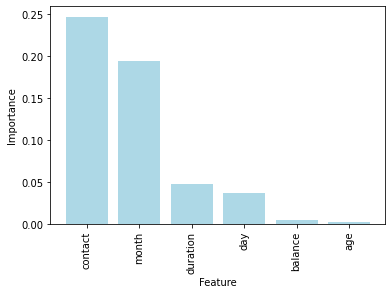

In [97]:
# plot important features
features = ['contact', 'month', 'duration', 'day', 'balance', 'age']
importance = [0.247, 0.194, 0.047, 0.037, 0.004, 0.002]

plt.bar(x = features, height = importance, color = 'lightblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation = 90)
plt.show()

#### Conclusion
The average accuracy score based on 5-fold cross validation is 98.9%. The features to focused on more are contact, month, and 